In [206]:
import sys
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install nbconvert
!{sys.executable} -m pip install colorspacious
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install opencv-python

In [207]:
import tensorflow as tf

import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

from colorspacious import cspace_converter
from matplotlib import colormaps
import matplotlib as mpl
import matplotlib.image as mpimg

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer

import numpy as np

In [208]:
p = Path("./Dataset/train_another")
dirs = p.glob("*")

image_data = []
labels = []
label_dict = {"damage":0,"no_damage":1}
bin_to_label = {0:"damage",1:"no_damage"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    print(label)
    cnt = 0
    print(folder_dir)

    for img_path in folder_dir.glob("*.jpeg"):
        img = image.load_img(img_path,target_size=(128,128))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt +=1
    
    print(cnt)

damage
Dataset\train_another\damage
5000
no_damage
Dataset\train_another\no_damage
5000


In [209]:
print(len(image_data))
print(len(labels))

10000
10000


In [210]:
x = np.array(image_data)
y = np.array(labels)

print(x.shape)
print(y.shape)

(10000, 128, 128, 3)
(10000,)


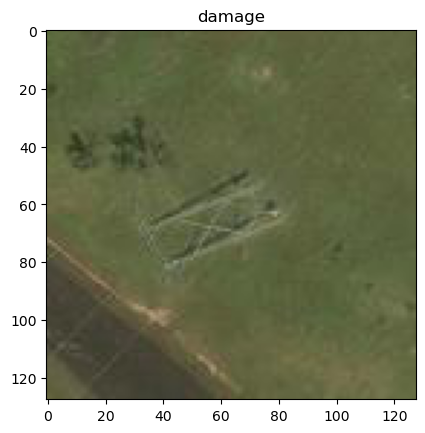

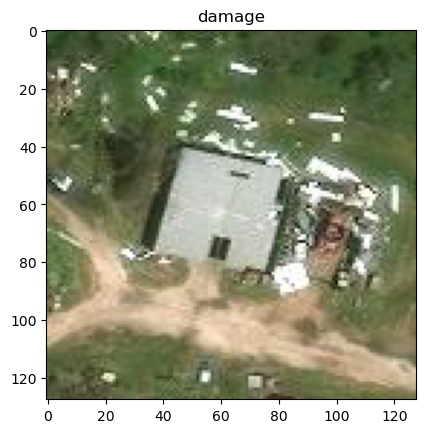

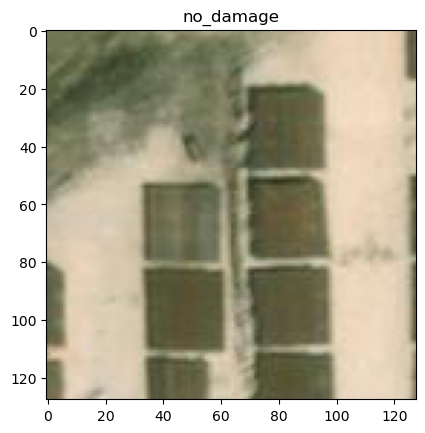

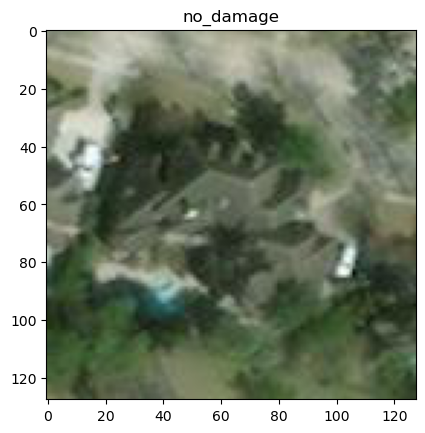

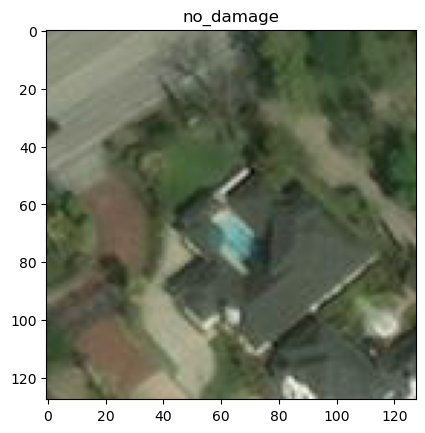

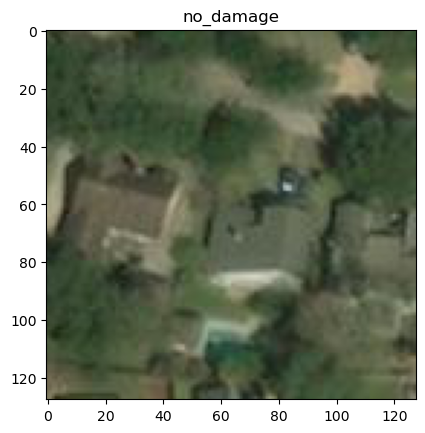

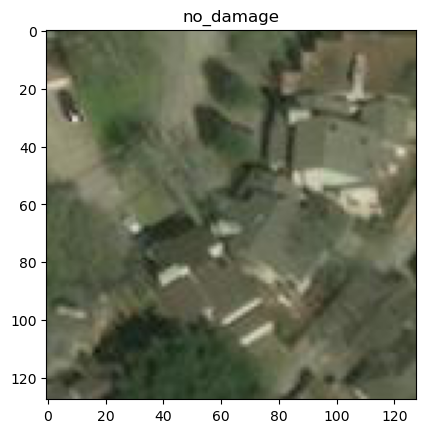

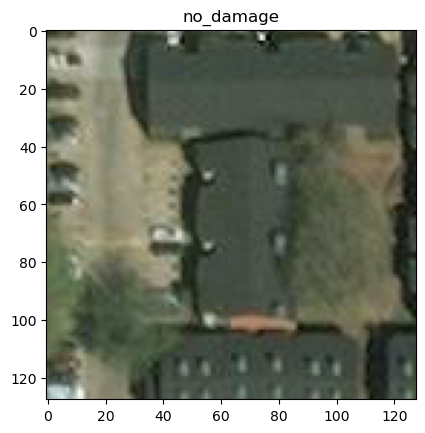

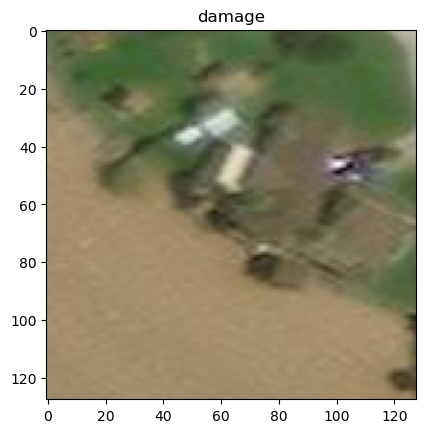

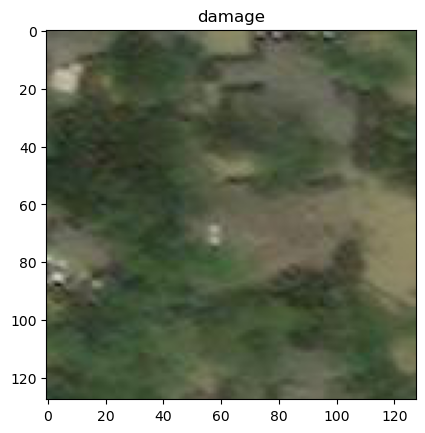

In [211]:
def drawImg(img, label):
    plt.title(bin_to_label[label])
    plt.imshow(img)
    plt.show()

for i in range(10):
   r = np.random.randint(10000)
   drawImg(x[r]/255.0,y[r])
   plt.close()

In [212]:
n_samples, height, width, channels = x.shape
img_reshape = x.reshape(-1, channels)

In [213]:
kmeans = KMeans(n_clusters=2)

In [214]:
kmeans.fit(img_reshape)

KMeans(n_clusters=2)

In [215]:
segmented_labels = kmeans.labels_
segmented_img = kmeans.cluster_centers_[segmented_labels]

In [216]:
segmented_img = segmented_img.reshape(x.shape)

In [217]:
segmented_img = segmented_img.astype(np.uint8)

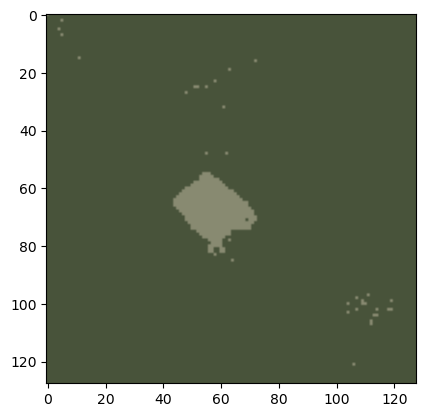

In [218]:
display_index = 0
display_image = segmented_img[display_index]

plt.imshow(display_image)
plt.show()

In [219]:
cluster_features = kmeans.labels_.reshape(n_samples, -1)
y_pseudo = segmented_labels.reshape(n_samples, -1).mean(axis=1).round().astype(int)

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [221]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [224]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_flat, y_train)

RandomForestClassifier(random_state=42)

In [225]:
y_pred = classifier.predict(x_test_flat)
print('\nAccuracy of Clustering Method:', format(accuracy_score(y_test, y_pred)))


Accuracy of Clustering Method: 0.851


In [226]:
conf_matrix = confusion_matrix(y_test, y_pred)

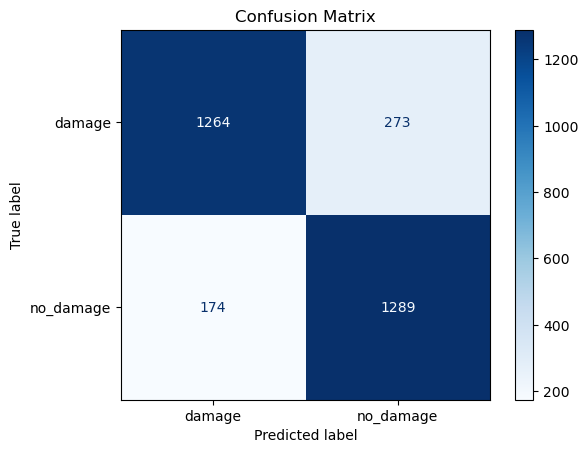

In [227]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=bin_to_label.values())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [258]:
model = Sequential([
   InputLayer(shape=(128, 128, 3)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax')
])

In [260]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [262]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [271]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.9849 - loss: 0.0510
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 143ms/step - accuracy: 0.9869 - loss: 0.0492
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.9814 - loss: 0.0658
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 136ms/step - accuracy: 0.9591 - loss: 0.1391
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.9895 - loss: 0.0308
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 137ms/step - accuracy: 0.9950 - loss: 0.0191
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 136ms/step - accuracy: 0.9970 - loss: 0.0087
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 136ms/step - accuracy: 0.9777 - loss: 0.0767
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 137ms/step - accuracy: 0.9603 - loss: 0.1563
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.9619 - loss: 0.1168


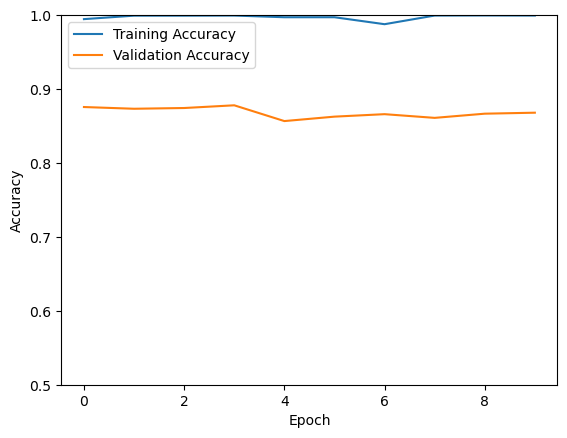

In [288]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [290]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nAccuracy:', test_acc)


Accuracy: 0.8679999709129333
